In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
class LogisticRegression:
    def __init__(self):
        self.weights = None
        self.bias = 0
        self.m = 0
        self.n = 0
        
    def Fit(self, df_features, df_prob, learning_rate):
        self.m, self.n = df_features.shape
        self.weights = np.zeros((self.n,1))
        df_prob = df_prob.to_numpy()
        df_prob_pred = self.sigmoid(df_features)

        self.GD(df_prob, df_features, learning_rate)


    def GD(self, y, x, rate):
        iterations = 1 
        while iterations < 10000: 
            y_pred = self.sigmoid(x)
            dw = (1/self.m) * np.dot(x.T,(y_pred - y))
            db = (1/self.m) * np.sum(y_pred - y)
            self.weights -= rate*dw
            self.bias -= rate*db
            iterations += 1

    def sigmoid(self, features):
        z = np.dot(features, self.weights) + self.bias
        return 1/(1+np.exp(-1*z))
        
    def predict(self, features):
        z = np.dot(features, self.weights) + self.bias
        return np.where(z > 0, 1, 0)

    def Split(self, df, train_fraction): # I used train fraction as a parameter to be more flexible :)
        df_train = df.sample(frac = train_fraction, random_state=13)
        df_test = df.iloc[[indices for indices in df.index if indices not in df_train.index]]
        return df_train,df_test        

In [3]:
df = pd.read_csv("diabetes (1).csv")

In [4]:
lr = LogisticRegression()

In [5]:
df_train,df_test = lr.Split(df, 0.8)

In [6]:
df_features = df.columns.values.tolist() # Since we know df can be treated as a dictionary of lists
df_features.pop(8)
x_train = df_train[df_features]
y_train = df_train[['Outcome']]
x_test = df_test[df_features]
y_test = df_test[['Outcome']]

In [7]:
lr.Fit(x_train, y_train, learning_rate = 0.0001)

In [8]:
lr.weights

array([[ 0.09920517],
       [ 0.01234978],
       [-0.02970995],
       [ 0.00309738],
       [ 0.00047473],
       [-0.00217321],
       [ 0.00750745],
       [-0.00895152]])

In [9]:
lr.bias

-0.038858083323318936

In [10]:
y_pred_test = lr.predict(x_test)
y_pred_test.flatten()

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

## Now i will calculate the percentage accuracy:

In [11]:
percentage = (((lr.predict(x_train) == y_train).sum().values[0])/np.shape((y_train))[0])*100
percentage = "{:.2f}".format(percentage)
print(f"The percetage accuracy of the model on train data is {percentage} %")

The percetage accuracy of the model on train data is 68.08 %


In [12]:
percentage = (((y_pred_test == y_test).sum().values[0])/np.shape((y_pred_test))[0])*100
percentage = "{:.2f}".format(percentage)
print(f"The percetage accuracy of the model on test data is {percentage} %")

The percetage accuracy of the model on test data is 73.38 %


## Graphs

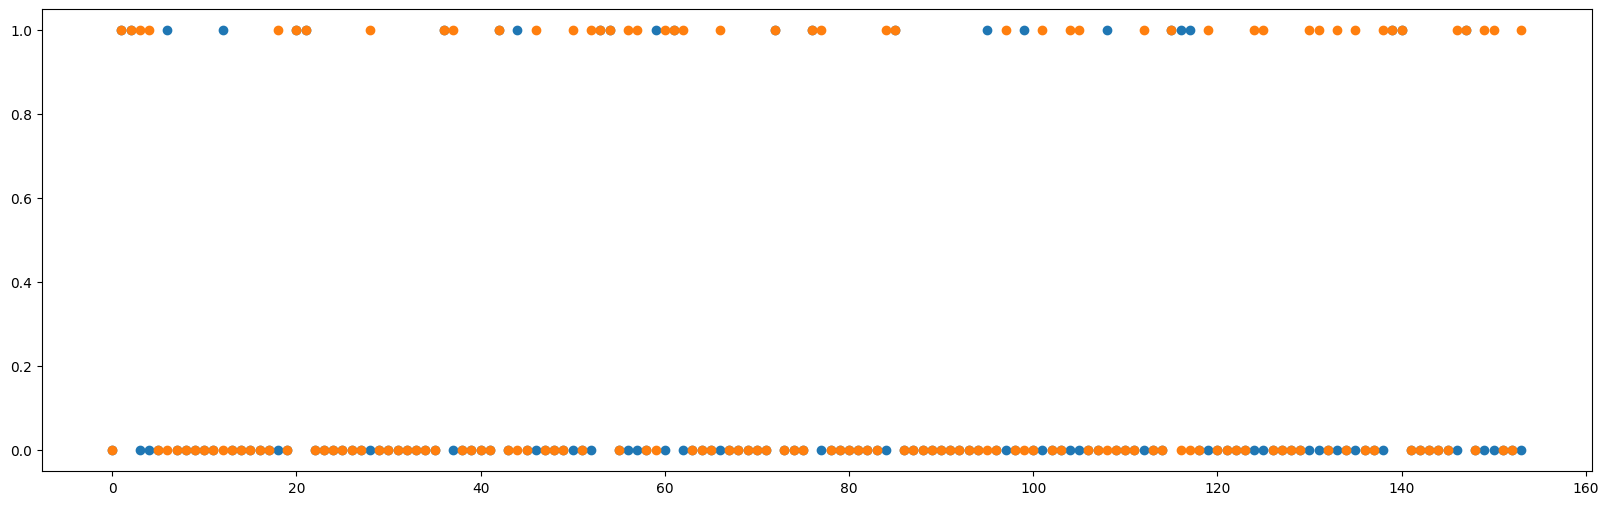

In [13]:
plt.figure(1, figsize=(20, 6))
plt.scatter([i for i in range(np.shape((y_pred_test))[0])], y_pred_test)
plt.scatter([i for i in range(np.shape((y_test))[0])], y_test);

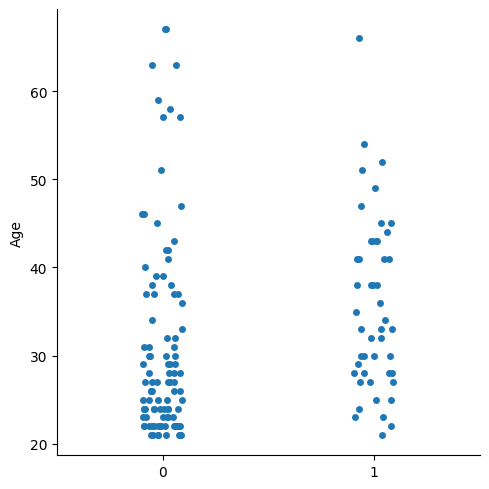

In [14]:
sns.catplot(x = y_test.values.ravel(), y = 'Age' , data = df_test);

In [15]:
z = np.dot(df[df_features], lr.weights) + lr.bias
y = 1/(1+np.exp(-1*z))

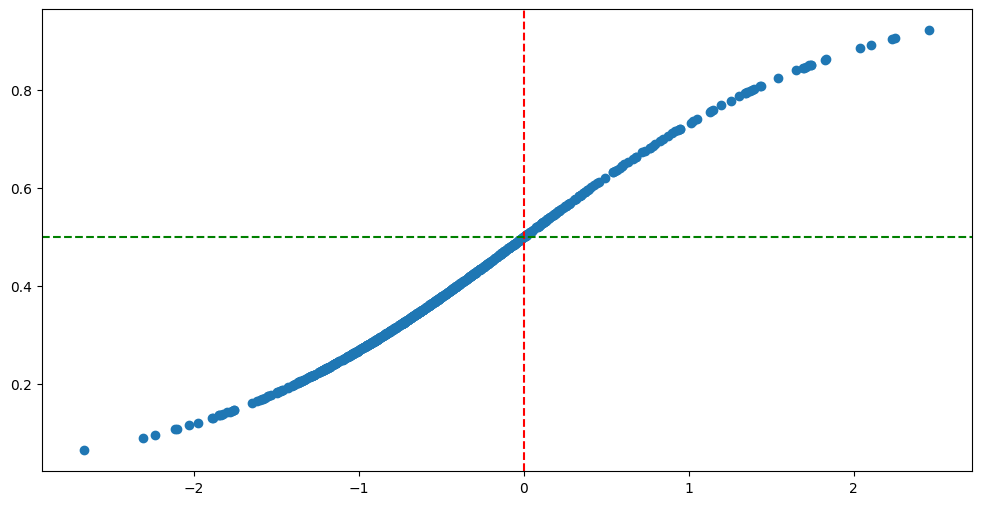

In [16]:
plt.figure(figsize = (12,6))
plt.scatter(z,y)
plt.axvline(x=0, color='red', linestyle='--', label='x=0')
plt.axhline(y=0.5, color='green', linestyle='--', label='y=0.5');